In [126]:
import pandas as pd

In [127]:
df = pd.read_csv("df_analyse.csv")

In [128]:
df

,Unnamed: 0,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,0,451120,4,1.0,0,0,0,0,0
1,1,722410,2,1.0,0,0,0,0,0
2,2,621210,7,0.0,0,0,0,0,0
3,3,0,2,0.0,0,0,0,0,0
4,4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...,...
897989,897989,451120,6,0.0,0,0,0,0,0
897990,897990,451130,6,0.0,0,0,0,0,0
897991,897991,332321,26,0.0,0,0,0,0,0
897992,897992,0,6,0.0,0,0,0,0,1


In [129]:
df.columns

Index(['Unnamed: 0', 'NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'MIS_Status'],
      dtype='object')

In [130]:
df = df[['NAICS', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob','FranchiseCode', 'UrbanRural', 'MIS_Status']]

KeyError: "['Term'] not in index"

In [ ]:
df

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,451120,4,1.0,0,0,0,0,0
1,722410,2,1.0,0,0,0,0,0
2,621210,7,0.0,0,0,0,0,0
3,0,2,0.0,0,0,0,0,0
4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...
897989,451120,6,0.0,0,0,0,0,0
897990,451130,6,0.0,0,0,0,0,0
897991,332321,26,0.0,0,0,0,0,0
897992,0,6,0.0,0,0,0,0,1


In [ ]:
df

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
0,451120,4,1.0,0,0,0,0,0
1,722410,2,1.0,0,0,0,0,0
2,621210,7,0.0,0,0,0,0,0
3,0,2,0.0,0,0,0,0,0
4,0,14,0.0,7,7,0,0,0
...,...,...,...,...,...,...,...,...
897989,451120,6,0.0,0,0,0,0,0
897990,451130,6,0.0,0,0,0,0,0
897991,332321,26,0.0,0,0,0,0,0
897992,0,6,0.0,0,0,0,0,1


D'apres le début de modélisation , nous avons vu que les colonne 'NAICS', 'RetainedJob', 'MIS_Status', 'NoEmp', 'Term', 'UrbanRural'
semble être les plus intéressante a la modelisation 

In [ ]:
# Nous allons donc organiser l'analyse de ces variables afin de comprendre les prédictions de notre modèle 


In [ ]:
# noEMP est le nombre d'employé

In [ ]:
# NAICS est la zone d'activité

In [ ]:
# Term est la durée en moi du contrat 

In [ ]:
# UrbanRural savoir si la société est dans une zone urbaine ou rural 

In [ ]:
import seaborn as sns 

In [ ]:
df["MIS_Status"]

0         0
1         0
2         0
3         0
4         0
         ..
897989    0
897990    0
897991    0
897992    1
897993    0
Name: MIS_Status, Length: 897994, dtype: int64

<AxesSubplot: xlabel='UrbanRural', ylabel='MIS_Status'>

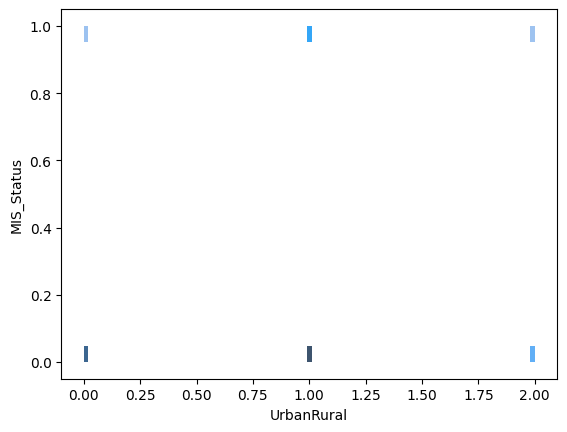

In [ ]:
sns.histplot(x=df.UrbanRural,y = df.MIS_Status)

In [ ]:
df = df[df["MIS_Status"]!=2]

In [ ]:
total = df.MIS_Status.count()
(df.MIS_Status.sum()/total)

0.1753697686176077

In [ ]:
# on  en déduit avoir 17% d'entreprise Rural

In [ ]:
# on veut maintenant savoir qui sont les plus susceptible entre les urbains et les rural de non payé 

In [ ]:
df.corr()

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
NAICS,1.000000,-0.038335,0.046867,-0.039320,-0.036513,0.024561,0.436705,0.105743
NoEmp,-0.038335,1.000000,-0.040063,0.008624,0.015386,0.007416,-0.041847,-0.026315
NewExist,0.046867,-0.040063,1.000000,-0.001828,-0.008950,0.142301,0.031345,0.019373
CreateJob,-0.039320,0.008624,-0.001828,1.000000,0.994020,0.001232,-0.029880,0.011906
RetainedJob,-0.036513,0.015386,-0.008950,0.994020,1.000000,-0.000509,-0.024788,0.012339
FranchiseCode,0.024561,0.007416,0.142301,0.001232,-0.000509,1.000000,-0.009471,-0.015284
UrbanRural,0.436705,-0.041847,0.031345,-0.029880,-0.024788,-0.009471,1.000000,0.158076
MIS_Status,0.105743,-0.026315,0.019373,0.011906,0.012339,-0.015284,0.158076,1.000000


ON en deduit il y a une légère correlation avec le fait d'être rural 

In [ ]:
df.MIS_Status.sum()/total

0.1753697686176077

on a 17,5 pourcent de chance de tomber sur une entreprise qui va pas payer 

In [ ]:
dfgros = df[df["NoEmp"]>1000]

In [ ]:
dfgros.corr()

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status
NAICS,1.000000,0.064278,0.243576,-0.055827,0.061669,0.010839,0.420341,0.047393
NoEmp,0.064278,1.000000,0.097736,-0.071516,-0.065882,0.020497,-0.072660,0.126662
NewExist,0.243576,0.097736,1.000000,-0.070633,-0.083904,0.276117,0.094672,0.117019
CreateJob,-0.055827,-0.071516,-0.070633,1.000000,0.142599,0.133880,0.045403,0.017728
RetainedJob,0.061669,-0.065882,-0.083904,0.142599,1.000000,-0.039652,0.170878,0.137466
FranchiseCode,0.010839,0.020497,0.276117,0.133880,-0.039652,1.000000,0.134167,0.130817
UrbanRural,0.420341,-0.072660,0.094672,0.045403,0.170878,0.134167,1.000000,0.069750
MIS_Status,0.047393,0.126662,0.117019,0.017728,0.137466,0.130817,0.069750,1.000000


l'on observe que pour les grosse entreprise , plus de 1000 employé , il y a une différence significative de la correlation entre No EMP et MIS_status 
le souci étant que dans notre jeux de donnée , il y a peu d'entreprise ayant plus de mille donnée 
idée : utiliser la méthode francaise et regrouper en grande entreprise , petite entreprise , et moyenne entreprise 

<AxesSubplot: xlabel='MIS_Status', ylabel='NoEmp'>

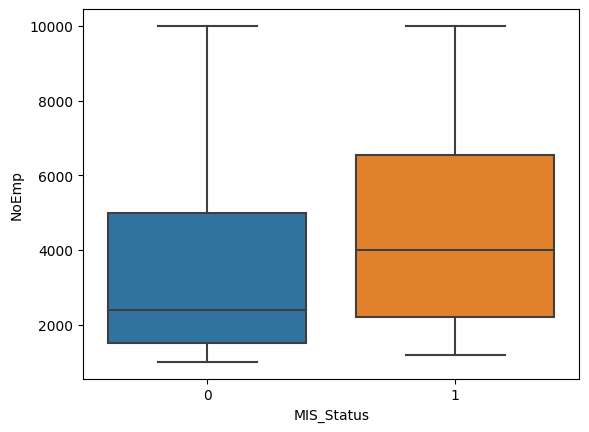

In [ ]:
sns.boxplot(x=dfgros.MIS_Status , y = dfgros.NoEmp)

<AxesSubplot: xlabel='MIS_Status', ylabel='NoEmp'>

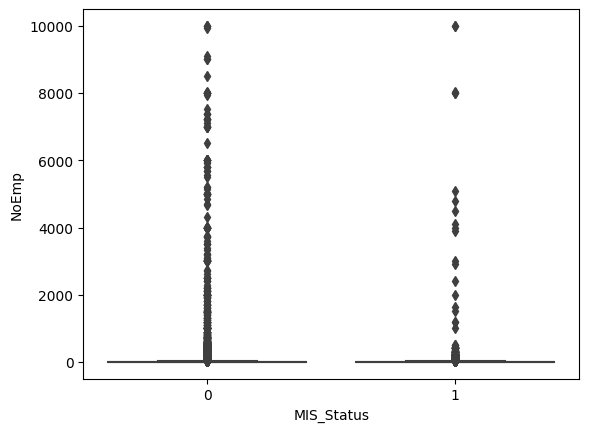

In [ ]:
sns.boxplot(x=df.MIS_Status , y = df.NoEmp)

<AxesSubplot: xlabel='MIS_Status', ylabel='NAICS'>

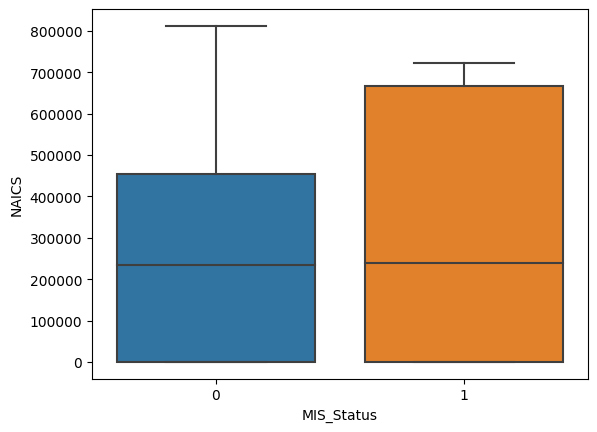

In [ ]:
sns.boxplot(x=dfgros.MIS_Status , y = dfgros.NAICS)

In [ ]:
df["NAICS2"] = df["NAICS"].astype(str).apply(lambda x:x[:2])

In [ ]:
df["NAICS2"]

0         45
1         72
2         62
3          0
4          0
          ..
897989    45
897990    45
897991    33
897992     0
897993     0
Name: NAICS2, Length: 897994, dtype: object

In [ ]:
df["dummy"] = 1

In [ ]:
secteur = df.groupby(df["NAICS2"]).sum()

In [ ]:
secteur["MIS_Status"]

NAICS2
0     16780
11      812
21      157
22       94
23    15459
31     2292
32     2934
33     5208
42     9477
44    18928
45     9927
48     5429
49      508
51     2820
52     2692
53     3904
54    12956
55       26
56     7658
61     1550
62     5734
71     3009
72    14869
81    14223
92       35
Name: MIS_Status, dtype: int64

In [ ]:
secteur

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,MIS_Status,dummy
NAICS2,,,,,,,,,
0,0,3375688,59605.0,6033923,6110410,16828,26555,16780,201644
11,1014884022,46457,2903.0,7093,17106,9,7825,812,8983
21,392994484,19663,551.0,2704,6625,4,1748,157,1847
22,146477879,5448,174.0,579,2219,11,594,94,662
23,15757736279,760941,11323.0,123173,385182,521,64348,15459,66575
31,3689615239,206830,3053.0,38109,93468,441,10727,2292,11787
32,5808311070,317484,3603.0,54096,144207,455,16225,2934,17910
33,12811777618,705566,6964.0,106226,288980,266,32742,5208,38223
42,20586184880,496389,8622.0,86487,223892,375,39945,9477,48663


<AxesSubplot: xlabel='MIS_Status', ylabel='NoEmp'>

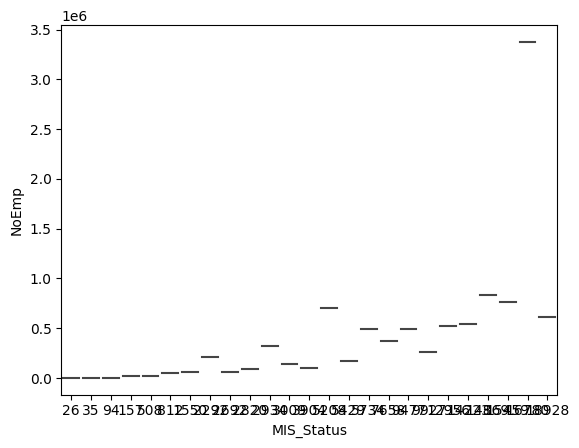

In [ ]:
sns.violinplot(x=secteur.MIS_Status,y=secteur.NoEmp)

In [ ]:
df["pme"] = df["NoEmp"].apply(lambda x: 1 if x<250 else 0)

In [ ]:
df["GE"] = df["NoEmp"].apply(lambda x: 1 if x>1000 else 0)

In [ ]:
secteur["ratio"] = secteur["MIS_Status"]/secteur["dummy"]

In [ ]:
secteur["ratio"].sort_values()

NAICS2
0     0.083216
21    0.085003
11    0.090393
55    0.101167
62    0.103717
33    0.136253
22    0.141994
92    0.152838
32    0.163819
54    0.190213
31    0.194452
42    0.194748
81    0.196079
71    0.205870
72    0.220370
44    0.223622
49    0.228726
23    0.232204
45    0.233670
56    0.234541
61    0.241546
51    0.248108
48    0.267465
52    0.283787
53    0.286532
Name: ratio, dtype: float64

Ceci nous permet de voir par secteur , ceux qui sont le plus touché par le non remboursement 
il semble que l'on ait des secteur touché trois fois plus que d'autre par exemple

a y reflechir , il serait interresant de trouver le regroupement Americain afin de creer plus particulièrement des categories petite entreprise et grosse entreprise americaine , qui on on le suspecte fort , des régime fiscal différent , et sont donc traité différement par la banque 
( si ils raisonne par categorie , nous devrons le faire nous aussi)   ( c'est dans l'historique même de la SBA )

In [ ]:
df_rur = df.groupby(df.UrbanRural).sum()

/tmp/ipykernel_76301/151860394.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rur = df.groupby(df.UrbanRural).sum()


In [ ]:
df_rur

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,MIS_Status,dummy,pme,GE
UrbanRural,,,,,,,,,,
0,70911774321,5181664,88072.0,6155245,6243954,19749,22952,322653,321819,183
1,236165124526,4149250,130103.0,1162777,2940182,25998,114829,470183,469750,60
2,50937656766,906059,34950.0,229640,494006,5948,19700,105158,105072,7


In [ ]:
df_rur["ratio"] = df_rur["MIS_Status"]/df_rur["dummy"]

In [ ]:
df_rur["ratio"]

UrbanRural
0    0.071135
1    0.244222
2    0.187337
Name: ratio, dtype: float64

on voit ici une tres grosse disparité entre le fait d'être Urbain ou Rural , les milieux rural ayant plus de 3 fois plus de chance de ne pas payer ( c'est ce que l'on appele l'inégalité géographique)


In [ ]:
dfmis= df.groupby(df.MIS_Status).sum()

/tmp/ipykernel_76301/727435599.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfmis= df.groupby(df.MIS_Status).sum()


In [ ]:
dfmis

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,dummy,pme,GE
MIS_Status,,,,,,,,,,
0,285721748043,9106275,205758.0,5263396,6983348,43845,526270,740513,739233,231
1,72292807570,1130698,47367.0,2284266,2694794,7850,154229,157481,157408,19


In [ ]:
dfmis["ratio"] = dfmis["pme"]/dfmis.dummy

In [ ]:
dfmis["ratio2"] = dfmis["GE"]/dfmis.dummy

In [ ]:
dfmis

,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,dummy,pme,GE,ratio,ratio2
MIS_Status,,,,,,,,,,,,
0,285721748043,9106275,205758.0,5263396,6983348,43845,526270,740513,739233,231,0.998271,0.000312
1,72292807570,1130698,47367.0,2284266,2694794,7850,154229,157481,157408,19,0.999536,0.000121


In [ ]:
(231/19) / (739233/157408)

2.5888317955730358

In [ ]:
231/19

12.157894736842104

In [ ]:
739233/157408

4.696286084570034

DE MANIERE interresante , on a plus de chance que une grande entreprise ne rembourse pas que une petite entreprise ne rembourse pas de lo'rdre de 2.5 fois plus de chance 

de manière logique il faut voir si cela n'est pas biaisé par une crise par exemple 

In [ ]:
# il nous reste encore a voir la colonne term et son impact 
# on va devoir changer le df , et faire du cleaning a nouveau 